In [1]:
!git clone https://github.com/EfratNechama/mlcourse mlcourse2

Cloning into 'mlcourse2'...


In [2]:
# standard imports
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime as dt
%matplotlib inline

# import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
# fetch original mnist dataset
from sklearn.datasets import fetch_openml
from matplotlib.colors import Normalize
import seaborn as sb


In [7]:
mnist = fetch_openml('mnist_784', version=1)

In [9]:
images = mnist.data[:5000,:]
targets = mnist.target[:5000]
X_data = images/255.0
Y = targets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y, test_size=0.15, random_state=42)

Text(0, 0.5, 'Accuracy')

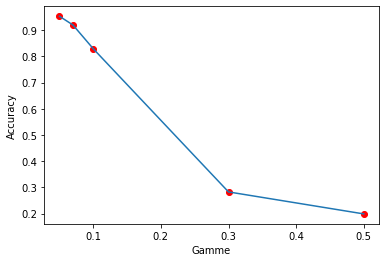

In [10]:
param_gamma=[0.05,0.07,0.1,0.3,0.5]
accuracy=[]
for i in param_gamma:
    classifier = svm.SVC(C=100,gamma=i)
    classifier.fit(X_train, y_train)
    expected = y_test
    predicted = classifier.predict(X_test)
    cm = metrics.confusion_matrix(expected, predicted)
    accuracy.append(metrics.accuracy_score(expected, predicted))
plt.plot(param_gamma,accuracy)
plt.scatter(param_gamma,accuracy,c="red")
plt.xlabel("Gamme")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

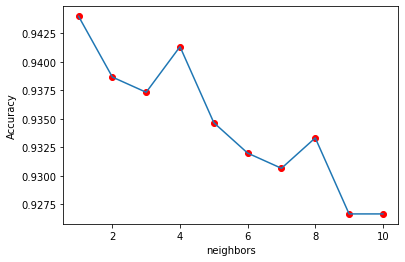

In [11]:
neighbors=[1,2,3,4,5,6,7,8,9,10]
accuracy=[]
for i in neighbors:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    predicted = neigh.predict(X_test)
    cm = metrics.confusion_matrix(expected, predicted)
    accuracy.append(metrics.accuracy_score(expected, predicted))
plt.plot(neighbors,accuracy)
plt.scatter(neighbors,accuracy,c="red")
plt.xlabel("neighbors")
plt.ylabel("Accuracy") 

In [12]:
print("THE BEST PARAMATERS K= "+str(4)+" GAMME= "+str(0.05))

THE BEST PARAMATERS K= 4 GAMME= 0.05


In [13]:
classifier = svm.SVC(C=100,gamma=0.05)
start_time = dt.datetime.now()
# print('Start learning at {}'.format(str(start_time)))
classifier.fit(X_train, y_train)
end_time = dt.datetime.now() 
# print('Stop learning {}'.format(str(end_time)))
elapsed_time= end_time - start_time
print('Elapsed learning {}'.format(str(elapsed_time)))

Elapsed learning 0:00:30.910386


In [14]:
neigh = KNeighborsClassifier(n_neighbors=4)
start_time = dt.datetime.now()
# print('Start learning at {}'.format(str(start_time)))
neigh.fit(X_train, y_train)
end_time = dt.datetime.now() 
# print('Stop learning {}'.format(str(end_time)))
elapsed_time= end_time - start_time
print('Elapsed learning {}'.format(str(elapsed_time)))

Elapsed learning 0:00:00.949496


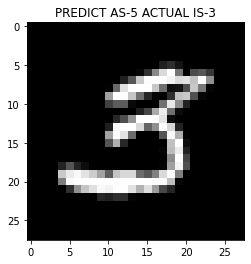

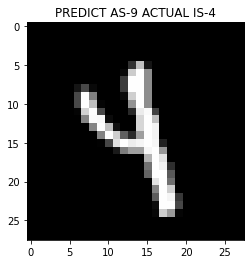

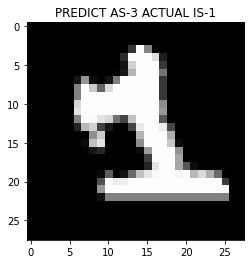

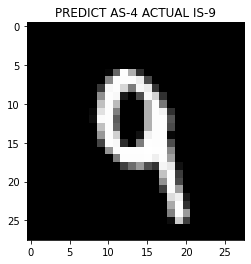

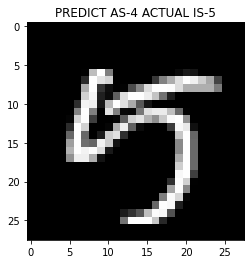

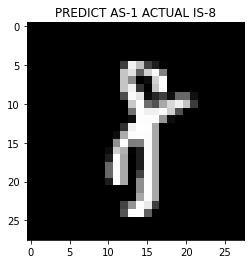

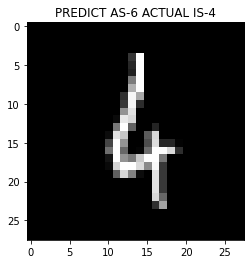

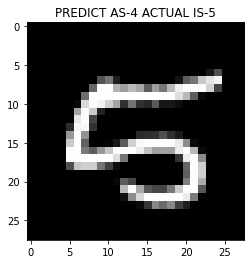

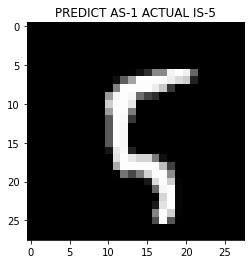

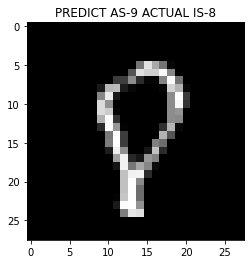

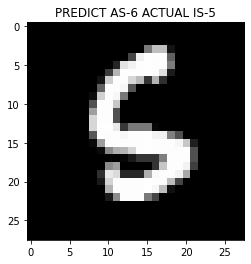

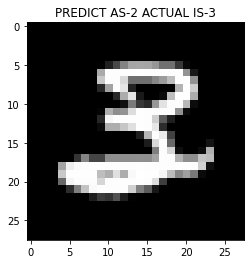

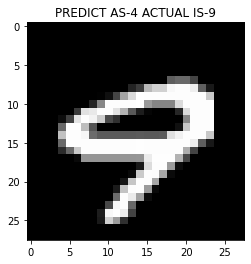

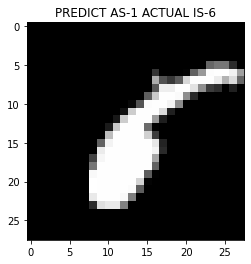

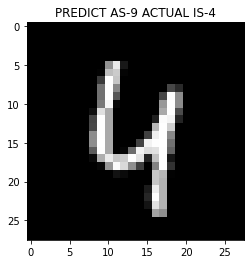

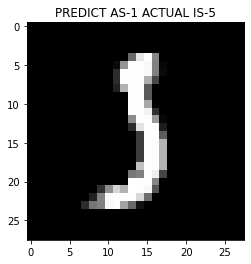

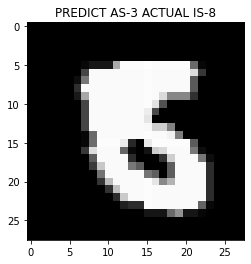

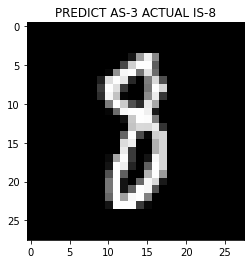

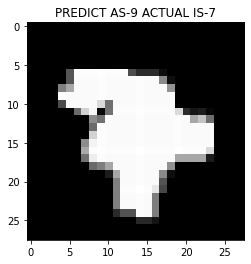

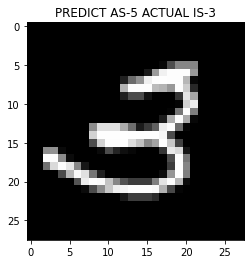

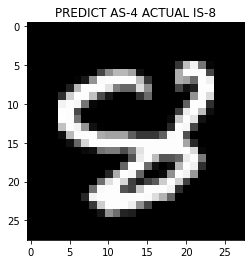

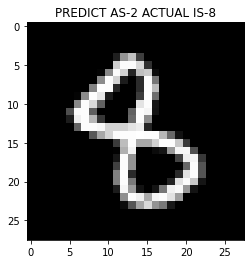

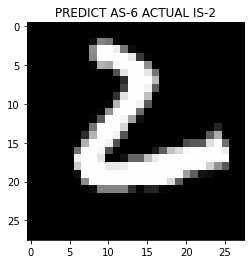

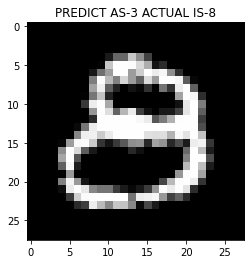

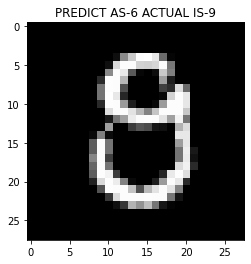

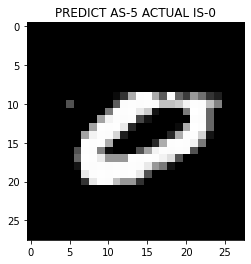

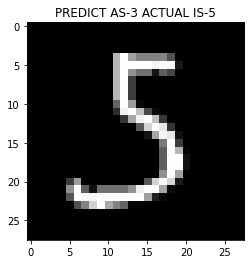

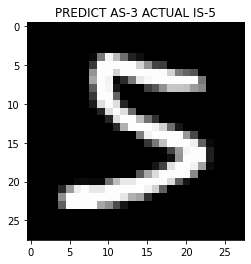

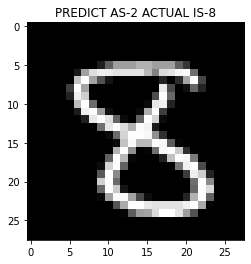

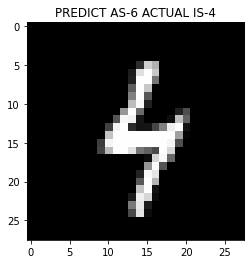

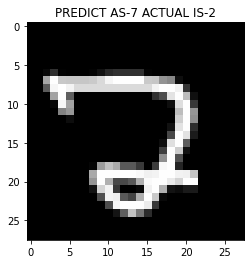

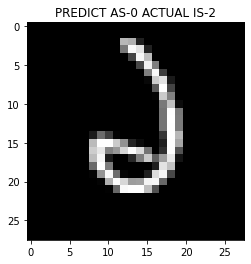

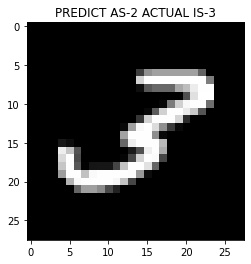

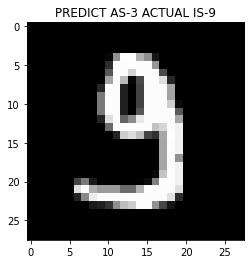

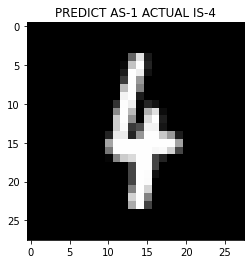

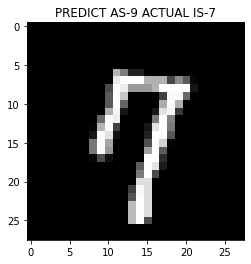

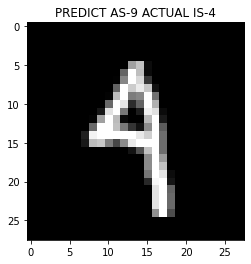

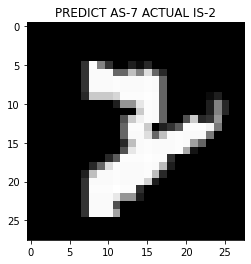

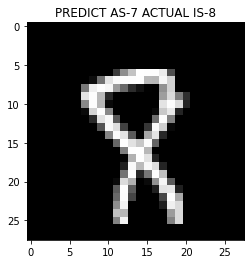

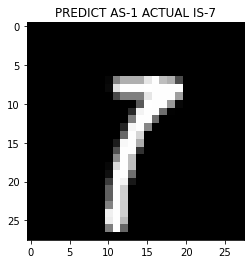

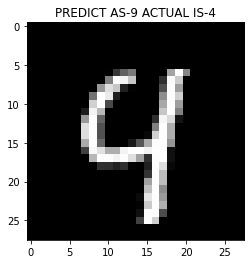

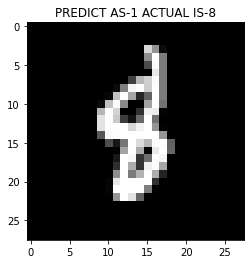

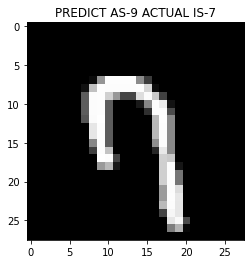

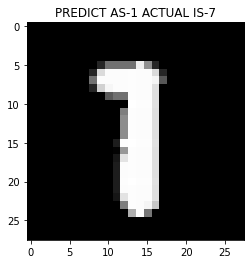

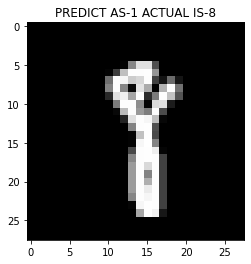

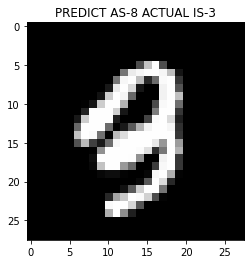

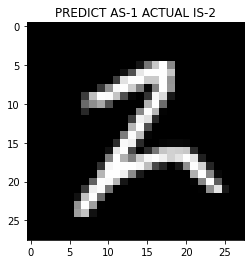

In [15]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
predicted = neigh.predict(X_test)
expected=list(y_test)
for i in range(0,len(expected)):
    if expected[i] != predicted[i]:
        plt.imshow(X_test[i].reshape((28, 28)), cmap='gray',interpolation='nearest')
        plt.title("PREDICT AS-"+str(predicted[i])+" ACTUAL IS-"+str(expected[i]))
        plt.show()

In [16]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

In [17]:
current_path2 = os.getcwd()#% Finding current directory of the notebook
current_path2 =os.path.join(current_path2,'./mlcourse/Fish.csv') # Adding file name at the end of the address
data2 = pd.read_csv(current_path2)# reading csv file given on current_path
fish2 = data2.copy()
print(fish2.sample(10))#Displaying 10 random samples from dataset
xtrain2 =fish2.copy()
xtrain2.drop(['Species'],axis=1,inplace=True) #Removing Species Column
ytrain2 = fish2['Species']

X_scaled = preprocessing.scale(xtrain2) # scaling so that mean =0 variance =1

kmeans = KMeans(n_clusters=7, random_state=0).fit(X_scaled) # make 7 clusters and fit on normalized data

    Species  Weight  Length1  Length2  Length3   Height   Width
125   Perch  1100.0     40.1     43.0     45.5  12.5125  7.4165
78    Perch    78.0     16.8     18.7     19.4   5.1992  3.1234
8     Bream   450.0     27.6     30.0     35.1  14.0049  4.8438
153   Smelt     9.8     11.4     12.0     13.2   2.2044  1.1484
46    Roach   140.0     21.0     22.5     25.0   6.5500  3.3250
117   Perch   650.0     36.5     39.0     41.4  11.1366  6.0030
82    Perch   110.0     19.0     21.0     22.5   5.6925  3.5550
80    Perch    85.0     17.8     19.6     20.8   5.1376  3.0368
27    Bream   714.0     32.7     36.0     41.5  16.5170  5.8515
107   Perch   300.0     26.9     28.7     30.1   7.5852  4.6354


10 is the best k


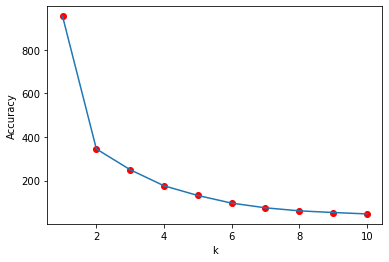

In [25]:
w=[]
k=[1,2,3,4,5,6,7,8,9,10]
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    w.append(kmeans.inertia_)
plt.plot(k,w)
plt.scatter(k,w,c="red")
plt.xlabel("k")
plt.ylabel("Accuracy") 
print("10 is the best k")